Same with sin only one input variable to visualize plot manim by function

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import scipy.stats as stats

In [3]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# data = pd.read_csv(url, sep=";")
# cols_zscore = data.keys().drop("quality")

# data = data[data["total sulfur dioxide"]<200]
# data[cols_zscore] = data[cols_zscore].apply(stats.zscore)
# data['bool_quality'] = 0
# data["bool_quality"][data['quality']>5] = 1

In [4]:
# X = torch.tensor(data[cols_zscore].values).float()
# y = torch.tensor(data["bool_quality"].values).float()

# y = y.reshape(-1,1)

In [117]:
X = torch.linspace(-np.pi*2, np.pi*2, 500).reshape(-1,1)
y = torch.sin(X)

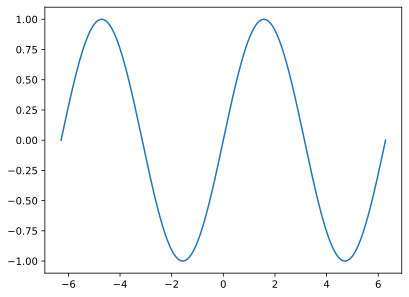

In [118]:
plt.plot(X, y);

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size,
                         shuffle=True, drop_last=True)
#drop_last se asegura de quitar el último batch con tamaño diferente

test_loader = DataLoader(test_dataset, batch_size=test_dataset.tensors[0].shape[0])

In [120]:
class Model(nn.Module):
    
    def __init__(self, act_func:str):
        super().__init__()
        self.inp = nn.Linear(X_train.shape[1], 256)
        self.hid1 = nn.Linear(256, 128)
        self.hid2 = nn.Linear(128, 64)
        self.hid3 = nn.Linear(64, 32)
        self.hid4 = nn.Linear(32, 16)
        self.hid5 = nn.Linear(16, 8)
        self.out = nn.Linear(8, 1)

        self.act_func = act_func
        
    def forward(self, x):

        act_func = getattr(torch.nn.functional, self.act_func)
        
        x = act_func(self.inp(x))
        x = act_func(self.hid1(x))
        x = act_func(self.hid2(x))
        x = act_func(self.hid3(x))
        x = act_func(self.hid4(x))
        x = act_func(self.hid5(x))

        x = self.out(x)
        return x

In [121]:
from tqdm import tqdm

In [122]:
def build_model(act_func):
    
    model = Model(act_func)
    loss_func = nn.MSELoss()
    optim = torch.optim.SGD(params=model.parameters(), 
                           lr=0.01)
    
    return model, loss_func, optim

def train_model(model, loss_func, optim, n_epochs, progress_bar=False):

    losses = torch.zeros(n_epochs)
    predictions = torch.zeros(n_epochs, X.shape[0], 1)
    
    if progress_bar:
        it = tqdm(range(n_epochs))
    else:
        it = range(n_epochs)
        
    for epoch in it:
        
        model.train()
        
        for (X_batch, y_batch) in train_loader:
            
            batch_train_accs = []
            batch_losses = []
            
            y_hat = model(X_batch) #forward pass
            
            loss = loss_func(y_hat, y_batch) #compute error
            
            optim.zero_grad() #clear gradient cache
            loss.backward()
            optim.step() #update parameters
            
            
            #store losses
            batch_losses.append(loss.item())
        
        losses[epoch] = np.mean(batch_losses)
        
        model.eval()

        with torch.no_grad():
            y_pred = model(X)
        
        predictions[epoch] = y_pred

        
        
    
    return losses, predictions
            

In [123]:
model, loss_func, optim = build_model(act_func="relu6")
losses, preds = train_model(model, loss_func, optim, n_epochs=100, progress_bar=True)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 27.76it/s]


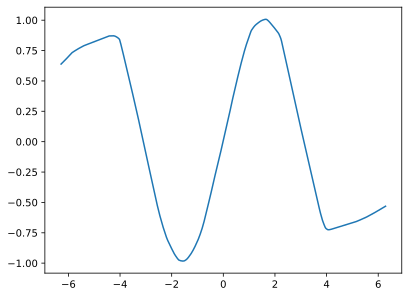

In [124]:
plt.plot(X, preds[99,:,:]);

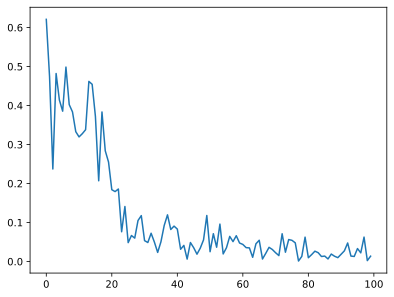

In [125]:
plt.plot(losses);

In [97]:
n_epochs = 100

In [126]:
model(X_train).shape

torch.Size([375, 1])

In [127]:
preds.shape

torch.Size([100, 500, 1])

In [128]:
n_epochs = 100

In [129]:
activation_funcs = ["sigmoid", "tanh", "relu", "hardshrink","gelu",
                    "leaky_relu", "relu6", "rrelu"]
losses = np.zeros((len(activation_funcs), n_epochs))
predictions = np.zeros((len(activation_funcs), n_epochs, X.shape[0], 1))
for idx, act_func in tqdm(enumerate(activation_funcs)):
    
    model, loss_func, optim = build_model(act_func)
    loss, preds = train_model(model,loss_func, optim, n_epochs)

    losses[idx] = loss
    predictions[idx] = preds

8it [00:30,  3.87s/it]


In [130]:
from manim import *

In [131]:
a = ["relu", "hardshrink"]

In [132]:
np.random.rand()

0.12789011212595436

In [133]:
import random

In [134]:
random.randint(0,255)

208

In [135]:
predictions.shape

(8, 100, 500, 1)

In [136]:
list(X.detach().numpy().ravel())

[-6.2831855,
 -6.2580023,
 -6.232819,
 -6.2076364,
 -6.182453,
 -6.15727,
 -6.1320868,
 -6.1069036,
 -6.081721,
 -6.0565376,
 -6.0313544,
 -6.006171,
 -5.980988,
 -5.9558053,
 -5.930622,
 -5.905439,
 -5.8802557,
 -5.8550725,
 -5.8298893,
 -5.8047066,
 -5.7795234,
 -5.75434,
 -5.729157,
 -5.703974,
 -5.678791,
 -5.653608,
 -5.6284246,
 -5.6032414,
 -5.5780582,
 -5.5528755,
 -5.5276923,
 -5.502509,
 -5.477326,
 -5.4521427,
 -5.42696,
 -5.401777,
 -5.3765936,
 -5.3514104,
 -5.326227,
 -5.3010445,
 -5.2758613,
 -5.250678,
 -5.225495,
 -5.2003117,
 -5.175129,
 -5.1499457,
 -5.1247625,
 -5.0995793,
 -5.074396,
 -5.0492134,
 -5.02403,
 -4.998847,
 -4.973664,
 -4.9484806,
 -4.923298,
 -4.8981147,
 -4.8729315,
 -4.8477483,
 -4.822565,
 -4.7973824,
 -4.772199,
 -4.747016,
 -4.7218328,
 -4.6966496,
 -4.671467,
 -4.6462836,
 -4.6211004,
 -4.595917,
 -4.570734,
 -4.5455513,
 -4.520368,
 -4.495185,
 -4.4700017,
 -4.4448185,
 -4.419636,
 -4.3944526,
 -4.3692694,
 -4.344086,
 -4.318903,
 -4.2937202,
 

In [144]:
%%manim -qm -v WARNING Project
class Project(Scene):

    def construct(self):

        ax = NumberPlane()
        

        plot = ax.plot_line_graph(x_values=list(X.detach().numpy().ravel()),
                          y_values=list(y.detach().numpy().ravel()),
                            add_vertex_dots=False,
                                 line_color=RED)
        tex = MathTex(r"\text{Real Data } f(x) = \sin(x)",
                     ).set_color_by_tex("x", RED).to_corner(UR)

        
        self.add(ax,plot)
        self.play(Create(tex))
        self.wait(2)

        epoch = ValueTracker(0)

        # plots = []
      
        # for idx, act_func in enumerate(activation_funcs):
        #     color = rgb_to_color([random.randint(0,255), random.randint(0,255), random.randint(0,255)])
        #     graph = ax.plot_line_graph(list(X.detach().numpy().ravel()),
        #                            list(predictions[idx,0].ravel()), #first epoch
        #                            add_vertex_dots=False,
        #                            line_color=color).add_updater(
        #                 lambda mob: mob.become(ax.plot_line_graph(list(X.detach().numpy().ravel()),
        #                                            list(predictions[idx,int(epoch.get_value())].ravel()), #first epoch
        #                                            add_vertex_dots=False,
        #                                            line_color=color)))

        
        
        #     # plots.append(graph)
        graph = ax.plot_line_graph(list(X.detach().numpy().ravel()),
                                   list(predictions[2,0].ravel()), #first epoch
                                   add_vertex_dots=False,
                                   line_color=YELLOW)
        self.add(graph)
        self.wait(2)
        
        # self.play(FadeIn(*[p for p in plots]), run_time=2)
        
        # self.wait(2)
        graph.add_updater(
                        lambda mob: mob.become(ax.plot_line_graph(list(X.detach().numpy().ravel()),
                                                   list(predictions[2,int(epoch.get_value())].ravel()), #first epoch
                                                   add_vertex_dots=False,
                                                   line_color=YELLOW)))
            
        self.play(epoch.animate.set_value(99), run_time=5)
        self.wait(15)
        #     # for idx, ax in enumerate(axes_lst):
        #     #     ax.plot_line_graph(list(X.detach().numpy().ravel()),
        #     #                        list(predictions[idx, 0].ravel()),
        #     #                        add_vertex_dots=False,
        #     #                        line_color=RED
                    
                    
            #     )


In [138]:
predictions.shape

(8, 100, 500, 1)

In [139]:
activation_funcs

['sigmoid',
 'tanh',
 'relu',
 'hardshrink',
 'gelu',
 'leaky_relu',
 'relu6',
 'rrelu']

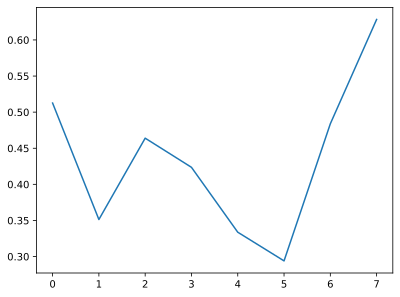

In [140]:
plt.plot(losses[:,7])